In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = [5, 5]

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
from astroML import stats as astroMLstats
from astroML.datasets import fetch_hogg2010test

from sklearn.mixture import GaussianMixture

from tqdm import tqdm

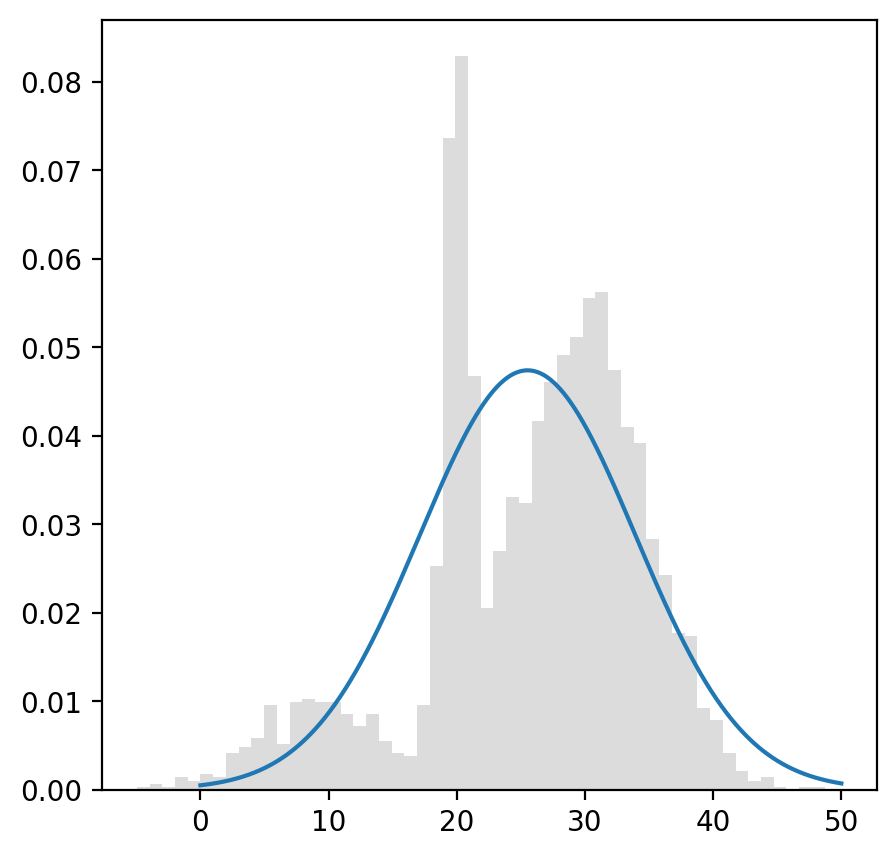

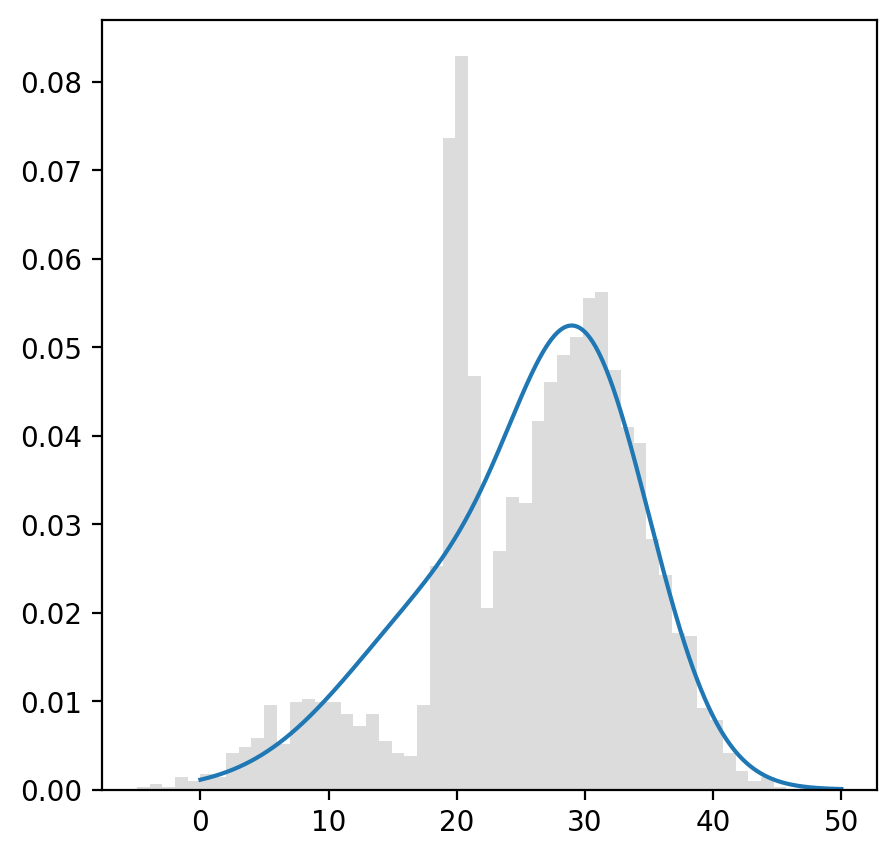

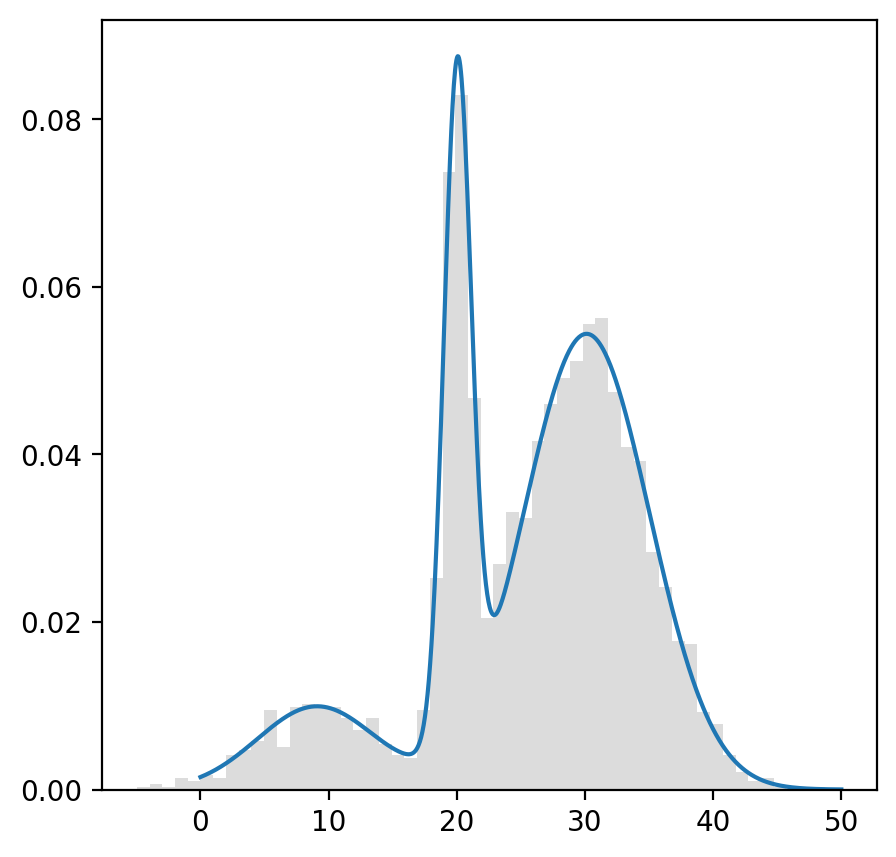

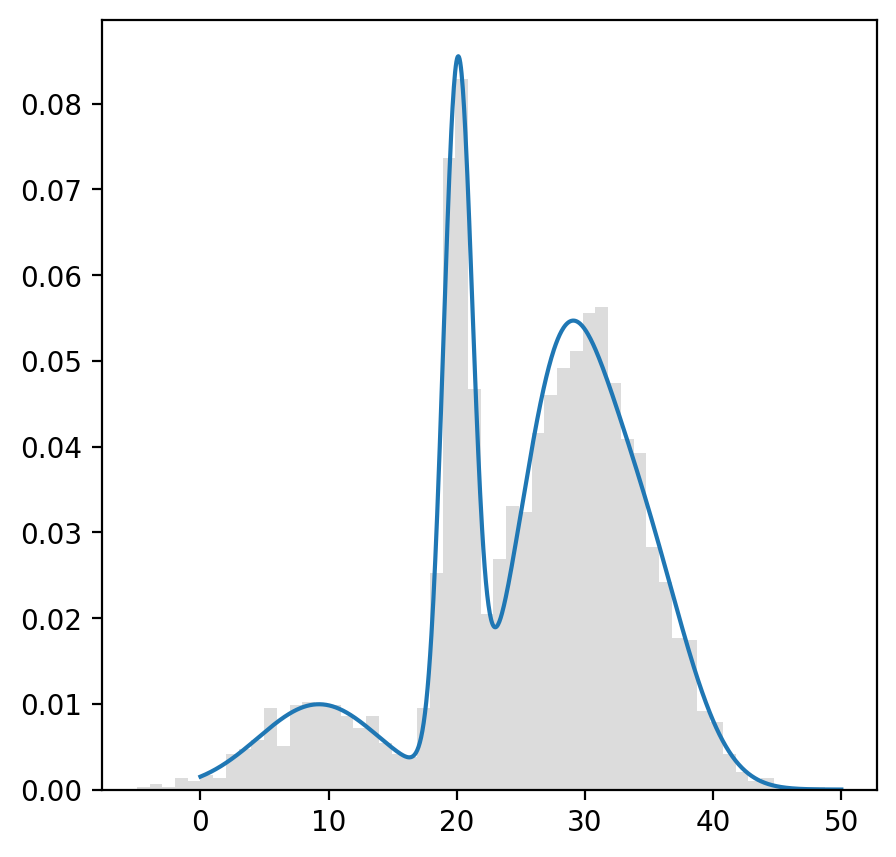

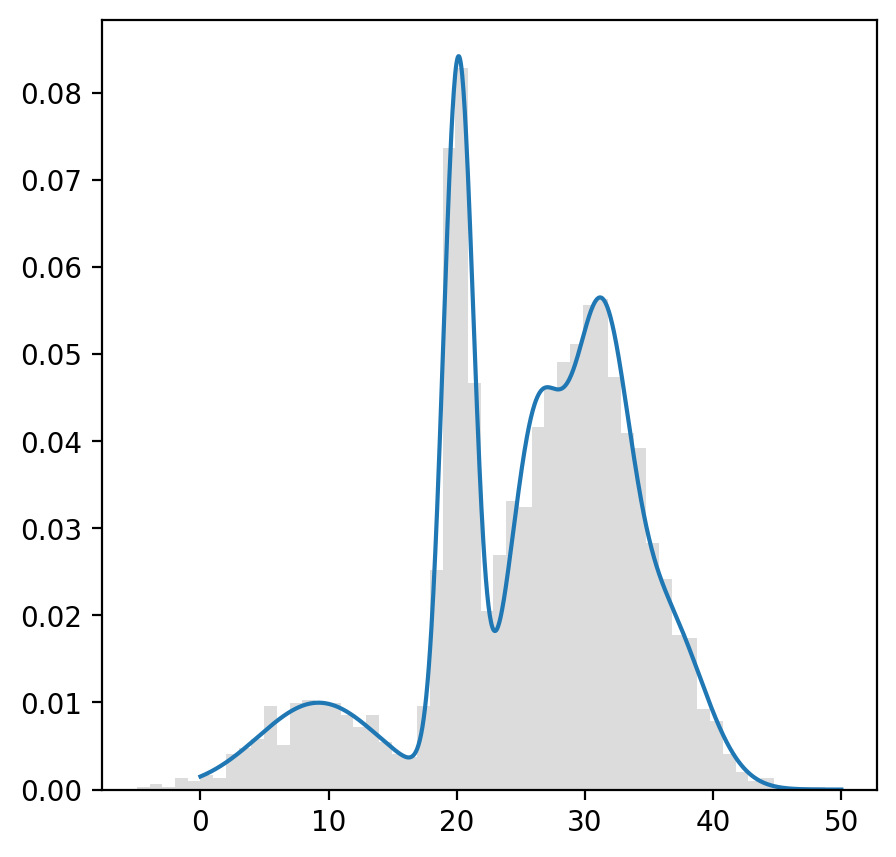

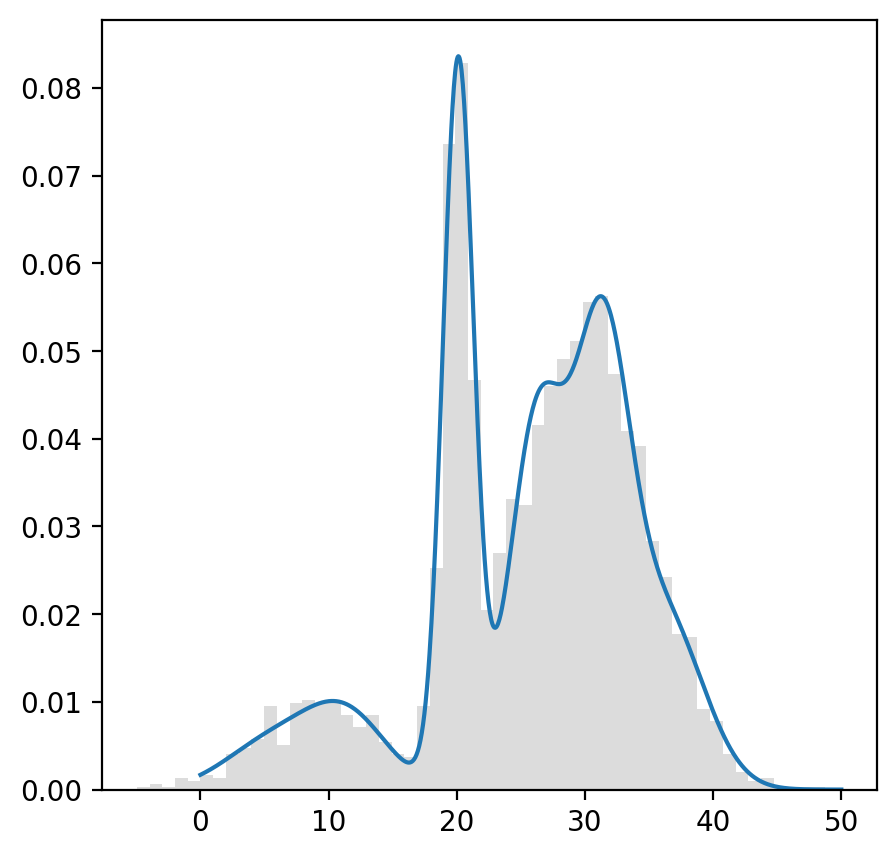

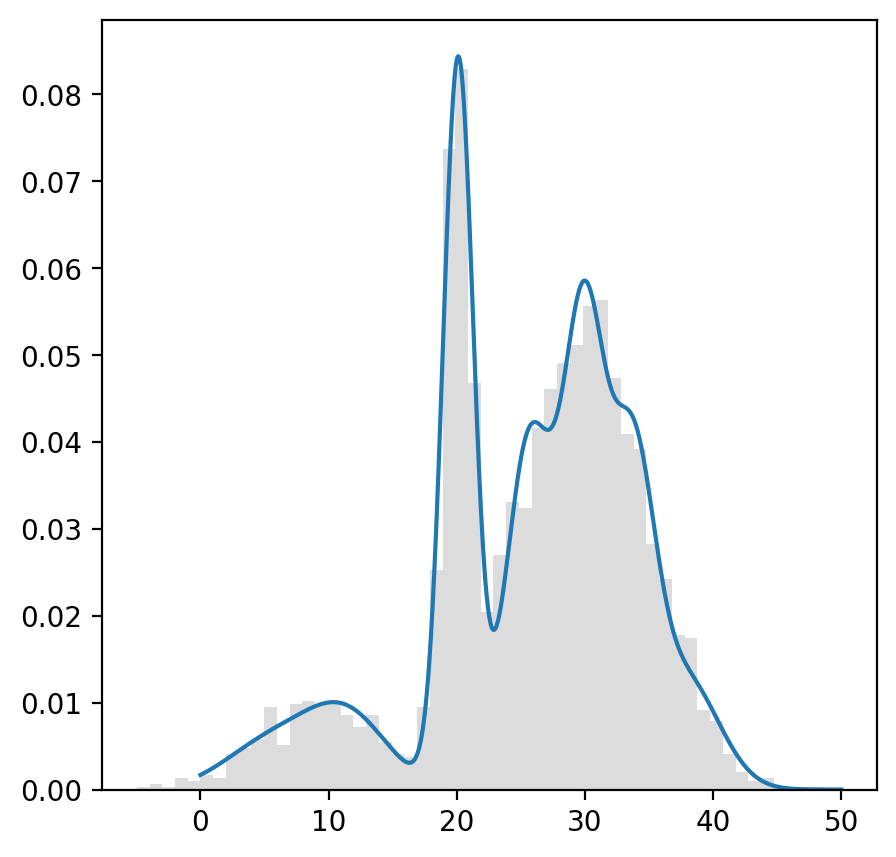

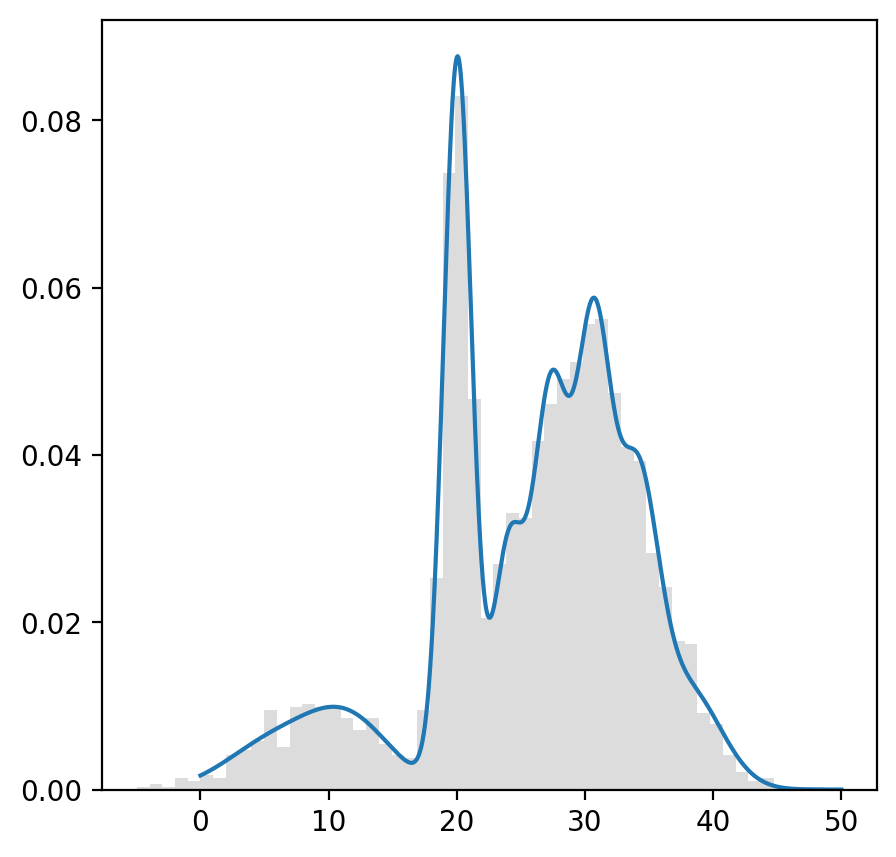

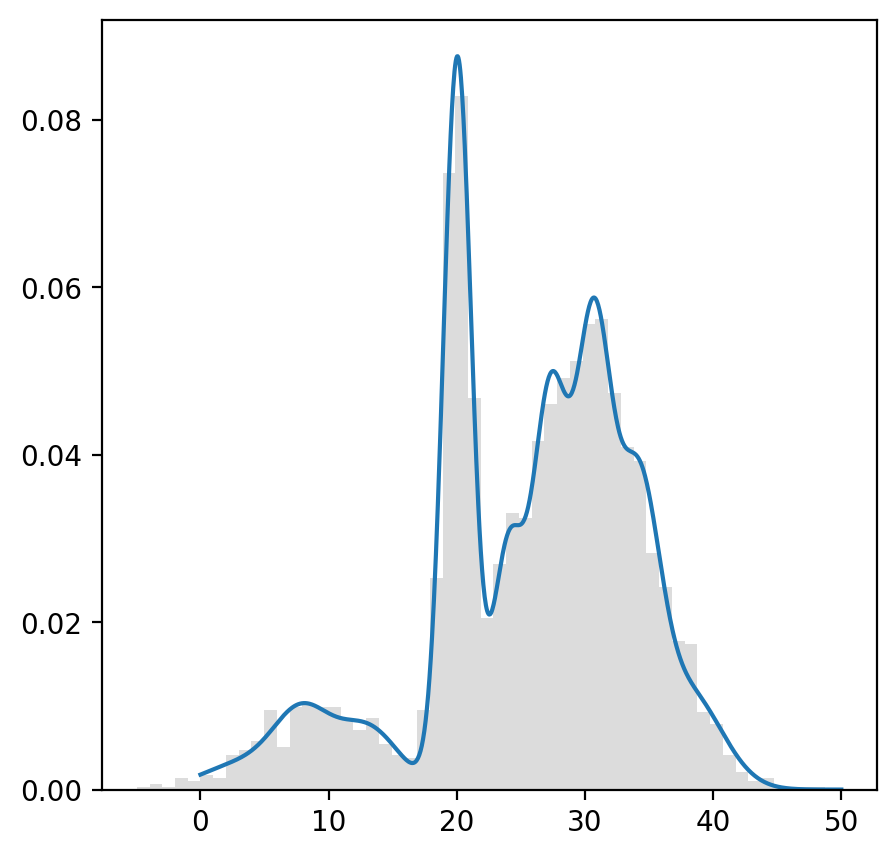

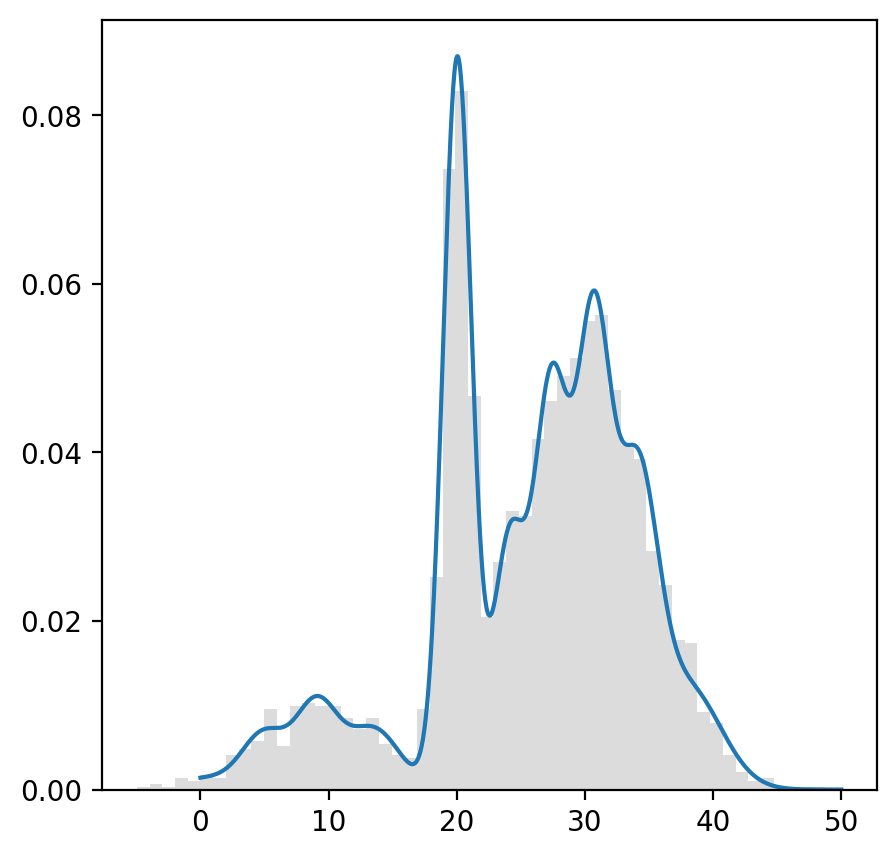

In [9]:
data = np.load(r"C:\Users\Admin\reps\astrostatistics_bicocca_2024\solutions\formationchannels.npy")
NvsAIC = np.zeros(shape = (10,2))
NvsBIC = np.zeros(shape = (10,2))

for n_comps in range(1,11):
    
    plt.hist(data, bins = int(np.sqrt(len(data))), density = True, color = 'gainsboro')
    
    x = np.linspace(0,50,1000)
    
    gm = GaussianMixture(n_components = n_comps, covariance_type='diag', random_state=0).fit(data)
    
    log_L = gm.score_samples(x.reshape(-1, 1)) #gives the logL of the sample
    pdf = np.exp(log_L)
    
    plt.plot(x, pdf)
    
    NvsAIC[n_comps - 1] = [n_comps, gm.aic(data)]
    NvsBIC[n_comps - 1] = [n_comps, gm.bic(data)]
    plt.show()

AIC best number of components = 3.0
BIC best number of components = 3.0


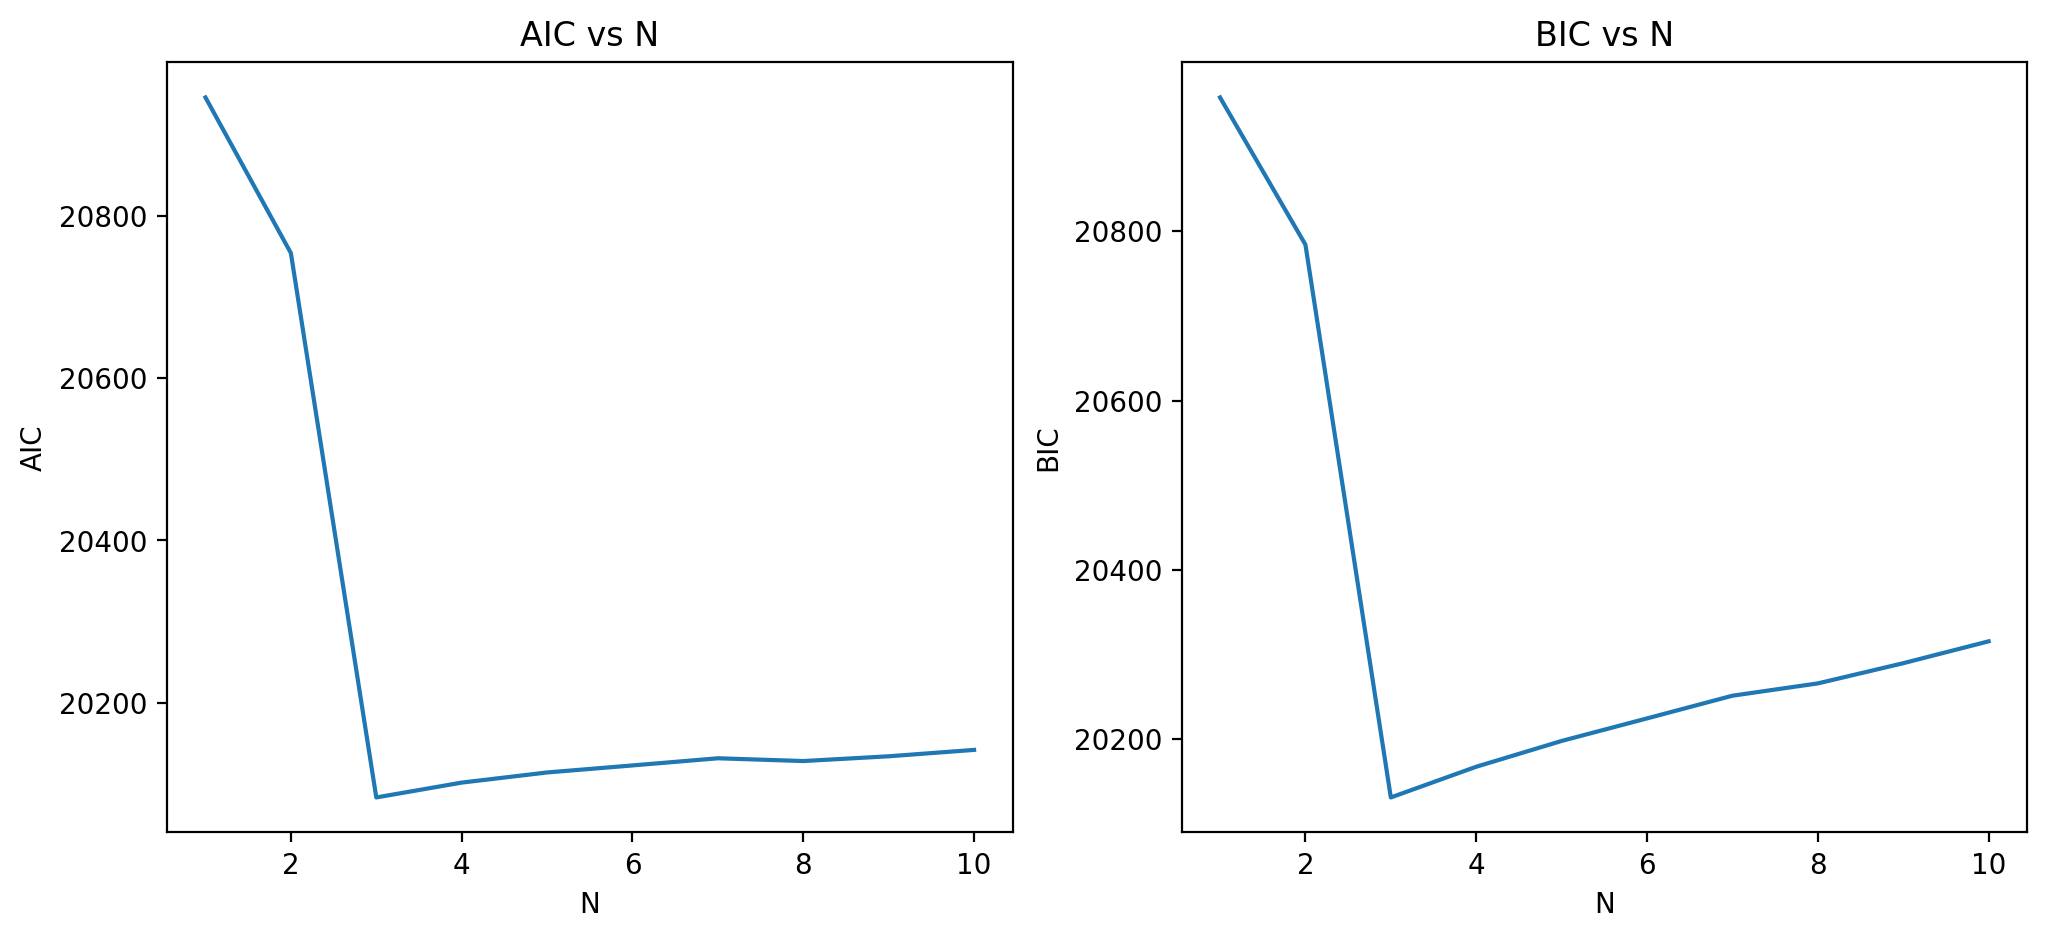

In [14]:
print('AIC best number of components = ' + str(NvsAIC[:,0][np.argmin(NvsAIC[:,1])]))
print('BIC best number of components = ' + str(NvsBIC[:,0][np.argmin(NvsBIC[:,1])]))

fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
ax.plot(NvsAIC[:,0], NvsAIC[:,1])
ax.set_xlabel('N')
ax.set_ylabel('AIC')
ax.set_title('AIC vs N')

ax = fig.add_subplot(122)
ax.plot(NvsBIC[:,0], NvsBIC[:,1])
ax.set_xlabel('N')
ax.set_ylabel('BIC')
ax.set_title('BIC vs N');

<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Admin\AppData\Local\Temp\ipykernel_1536\618913980.py:16: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Black hole mass $[M_\odot]$")


Text(0.5, 0, 'Black hole mass $[M_\\odot]$')

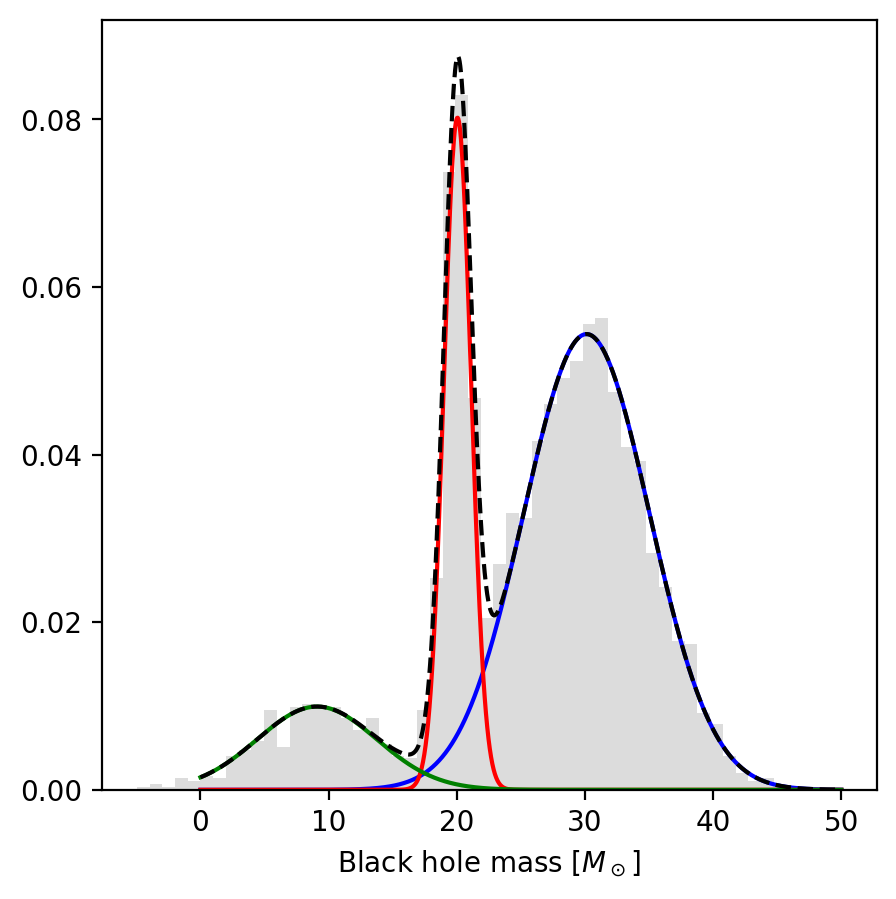

In [18]:
gm_good = GaussianMixture(n_components = 3, covariance_type='diag', random_state=0).fit(data)
x = np.linspace(0,50,1000)
plt.hist(data, bins = int(np.sqrt(len(data))), density = True, color = 'gainsboro')
log_L = gm_good.score_samples(x.reshape(-1, 1))
pdf = np.exp(log_L)

resp = gm_good.predict_proba(x.reshape(-1, 1)) #gives the probability of the components for each sample

component = resp * pdf[:, np.newaxis]

plt.plot(x, component[:,0], c='blue')
plt.plot(x, component[:,1], c='red')
plt.plot(x, component[:,2], c='green')
plt.plot(x, pdf, '--k')

plt.xlabel("Black hole mass $[M_\odot]$")

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Admin\AppData\Local\Temp\ipykernel_1536\526960408.py:7: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("Black hole mass $[M_\odot]$")


Text(0.5, 0, 'Black hole mass $[M_\\odot]$')

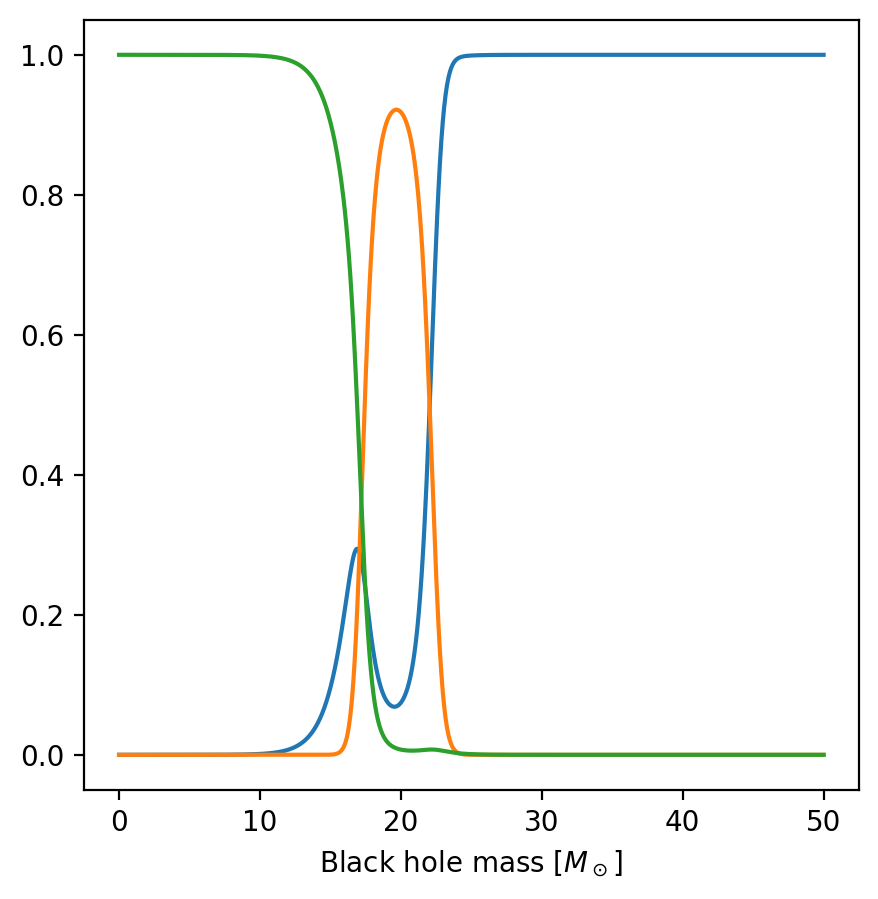

In [20]:
#data_sorted = np.sort(data, axis = 0)

plt.plot(x, gm_good.predict_proba(x.reshape(-1, 1))[:,0])
plt.plot(x, gm_good.predict_proba(x.reshape(-1, 1))[:,1])
plt.plot(x, gm_good.predict_proba(x.reshape(-1, 1))[:,2])

plt.xlabel("Black hole mass $[M_\odot]$")